LAB 09


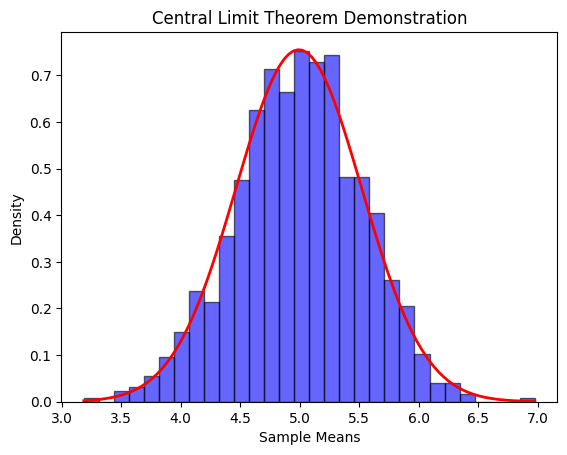

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_samples = 1000
sample_size = 30

uniform_samples = np.random.uniform(0, 10, n_samples * sample_size).reshape((n_samples, sample_size))

sample_means = uniform_samples.mean(axis=1)

plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

mean = np.mean(sample_means)
std_dev = np.std(sample_means)
x = np.linspace(min(sample_means), max(sample_means), 100)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r-', lw=2)
plt.title("Central Limit Theorem Demonstration")
plt.xlabel("Sample Means")
plt.ylabel("Density")
plt.show()


In [ ]:

p_printer1 = 0.4
p_printer2 = 0.6
mean_printer1 = 2
time_threshold = 1

p_time_given_printer1 = 1 - np.exp(-time_threshold / mean_printer1)

p_time_given_printer2 = time_threshold / 5

p_time = p_time_given_printer1 * p_printer1 + p_time_given_printer2 * p_printer2
p_printer1_given_time = (p_time_given_printer1 * p_printer1) / p_time

print(f"The probability that the job was printed by Printer I is: {p_printer1_given_time:.4f}")


The probability that the job was printed by Printer I is: 0.5674


The proportion of students who scored above 80 is: 0.3085


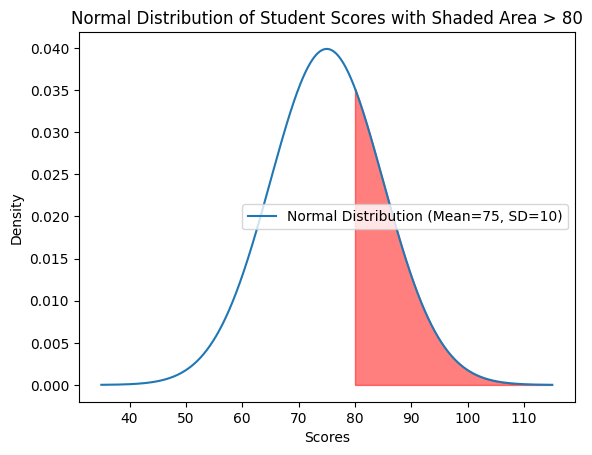

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10000
mean = 60
variance = 36
std_dev = np.sqrt(variance)

scores = np.random.normal(mean, std_dev, N)

proportion = np.sum((scores >= 50) & (scores <= 70)) / N

x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
y = norm.pdf(x, mean, std_dev)

plt.plot(x, y)

x_shade = np.linspace(50, 70, 100)
y_shade = norm.pdf(x_shade, mean, std_dev)
plt.fill_between(x_shade, y_shade, color='gray', alpha=0.5)

plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Student Scores')

plt.show()

print("Proportion of students with scores between 50 and 70:", proportion)

LAB 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lambda_ = 2

prob_more_than_3 = 1 - np.exp(-lambda_ * 3)

prob_more_than_1_given_2 = 1 - np.exp(-lambda_ * 1)

print(f"Probability that a shower will last more than 3 minutes: {prob_more_than_3:.4f}")
print(f"Probability that a shower will last at least one more minute, given it has already lasted 2 minutes: {prob_more_than_1_given_2:.4f}")

Probability that a shower will last more than 3 minutes: 0.9975
Probability that a shower will last at least one more minute, given it has already lasted 2 minutes: 0.8647


In [ ]:
import numpy as np

lambda_original = 0.0003

lambda_redesigned = 0.00035

prob_original = 1 - np.exp(-lambda_original * 10000)

prob_redesigned = 1 - np.exp(-lambda_redesigned * 10000)

print(f"Proportion of original fans lasting at least 10000 hours: {prob_original:.4f}")
print(f"Proportion of redesigned fans lasting at least 10000 hours: {prob_redesigned:.4f}")

Proportion of original fans lasting at least 10000 hours: 0.9502
Proportion of redesigned fans lasting at least 10000 hours: 0.9698


<ipython-input-12-a437d7254546>:7: RuntimeWarning: invalid value encountered in log
  logged_samples = np.log(samples[~np.isnan(samples)])


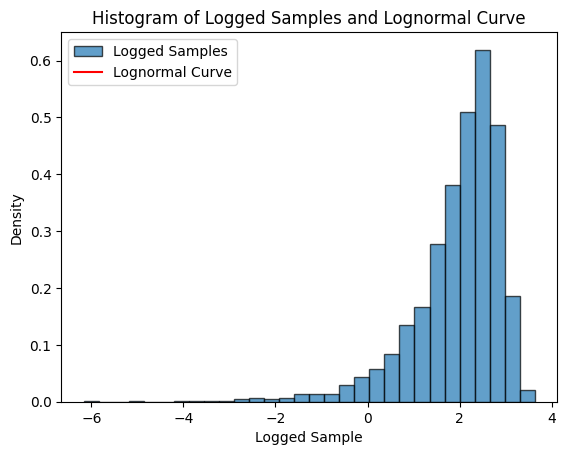

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

samples = np.random.normal(7, 8, 9000)

logged_samples = np.log(samples[~np.isnan(samples)])

mean_logged = np.mean(logged_samples)
std_dev_logged = np.std(logged_samples)

plt.hist(logged_samples, bins=30, density=True, alpha=0.7, edgecolor='black', label='Logged Samples')

x = np.linspace(mean_logged - 3*std_dev_logged, mean_logged + 3*std_dev_logged, 100)
y = lognorm.pdf(x, std_dev_logged, scale=np.exp(mean_logged))
plt.plot(x, y, 'r-', label='Lognormal Curve')

plt.xlabel('Logged Sample')
plt.ylabel('Density')
plt.title('Histogram of Logged Samples and Lognormal Curve')
plt.legend()
plt.show()

In [ ]:
import scipy.stats as st

mean = 527
std_dev = 112

prob_above_500 = 1 - st.norm.cdf(500, mean, std_dev)
print("Probability of scoring above 500:", prob_above_500)

highest_5_percentile = st.norm.ppf(0.95, mean, std_dev)
print("Score to be in the highest 5%:", highest_5_percentile)

prob_between_527_and_554 = st.norm.cdf(554, mean, std_dev) - st.norm.cdf(527, mean, std_dev)
print("Probability of scoring between 527 and 554:", prob_between_527_and_554)

Probability of scoring above 500: 0.5952501217429682
Score to be in the highest 5%: 711.2236062185649
Probability of scoring between 527 and 554: 0.0952501217429681


LAB 12


In [1]:
import numpy as np
from scipy.stats import norm

data = [23, 29, 31, 22, 25, 30, 28, 27, 32, 26]
confidence_level = 0.95

mean = np.mean(data)
std_dev = np.std(data, ddof=1)

n = len(data)

z_score = norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * (std_dev / np.sqrt(n))

confidence_interval = (mean - margin_of_error, mean + margin_of_error)
confidence_interval


(25.232983825383176, 29.367016174616825)

In [2]:
mu = 5000
sample_mean = 5200
std_dev = 800
n = 100
alpha = 0.05

z_score = (sample_mean - mu) / (std_dev / np.sqrt(n))

critical_z = norm.ppf(1 - alpha)

if z_score > critical_z:
    result = "Reject the null hypothesis. The mean has increased."
else:
    result = "Fail to reject the null hypothesis. No significant increase in mean."
result


'Reject the null hypothesis. The mean has increased.'

In [3]:
mean_income = 900
std_dev_income = 200
percentile = 0.03

z_score = norm.ppf(percentile)

income_level = mean_income + z_score * std_dev_income
income_level


523.8412783697497